In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),              # converts image to tensor [0,1]
    transforms.Normalize((0.1307,), (0.3081,))  # mean & std of MNIST
])

In [4]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 134MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 35.2MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 115MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.09MB/s]


In [5]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

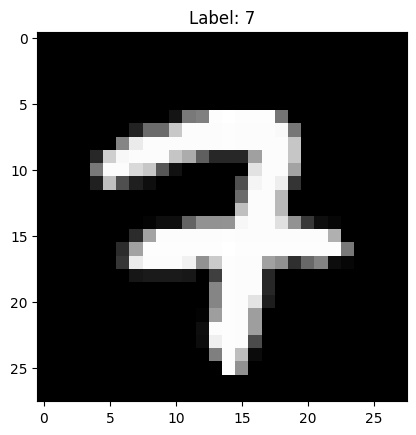

In [6]:
images, labels = next(iter(train_loader))

plt.imshow(images[0].squeeze(), cmap="gray")
plt.title(f"Label: {labels[0]}")
plt.show()

In [7]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MNISTModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(loader)

In [10]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions = outputs.argmax(dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    return correct / total

In [12]:
epochs = 5

for epoch in range(epochs):
    loss = train(model, train_loader, optimizer, criterion)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Loss: {loss:.4f}")
    print("-" * 30)

Epoch 1/5
Loss: 0.0810
------------------------------
Epoch 2/5
Loss: 0.0599
------------------------------
Epoch 3/5
Loss: 0.0489
------------------------------
Epoch 4/5
Loss: 0.0392
------------------------------
Epoch 5/5
Loss: 0.0324
------------------------------
